In [1]:
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt

In [81]:
er = pd.read_csv('../csv_raw/ER_L24_t2.csv')#,sep='\t')
te = pd.read_csv('../csv_raw/TE_t2_t1.csv')
time='t2'

In [103]:
er = pd.read_csv('../csv_raw/ER_L24_t1.csv')#,sep='\t')
te = pd.read_csv('../csv_raw/TE_t1_t0.csv')
time='t1'
er.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,NM_017847,112.294090,-0.662837,0.273813,-2.420767,0.015488,0.120137
1,NM_001003803,182.333378,-0.132781,0.224270,-0.592060,0.553811,0.801922
2,NM_001003800,354.785989,0.072009,0.368656,0.195327,0.845137,0.946766
3,NM_016649,208.700788,-0.619136,0.286961,-2.157560,0.030962,0.178877
4,NM_016647,148.352948,0.746495,0.615334,1.213155,0.225071,0.518246


In [104]:
data = pd.DataFrame({'AccNum':er['Unnamed: 0'],
                     'ER':er['log2FoldChange'],'TE':te['log2FoldChange']})

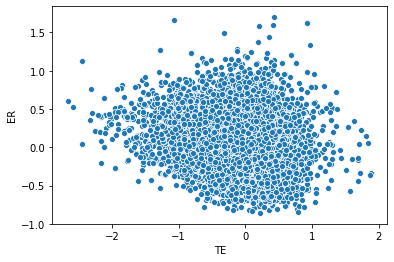

In [105]:
ax = sns.scatterplot(x="TE", y="ER", data=data)

In [65]:
prob = pd.read_csv('../../../../MOTIF/SeqLogo/gene_likelihood/ER_L24_t1_enriched_likelihood.csv')
p = []
for acc in data['AccNum']:
    row = prob.loc[prob['AccNum']==acc]
    if len(row)== 0:
        p.append(float('NaN'))
    else:
        p.append(-row['logLikelihood'].values[0])

In [66]:
data['- logLikelihood to L24t1'] = p

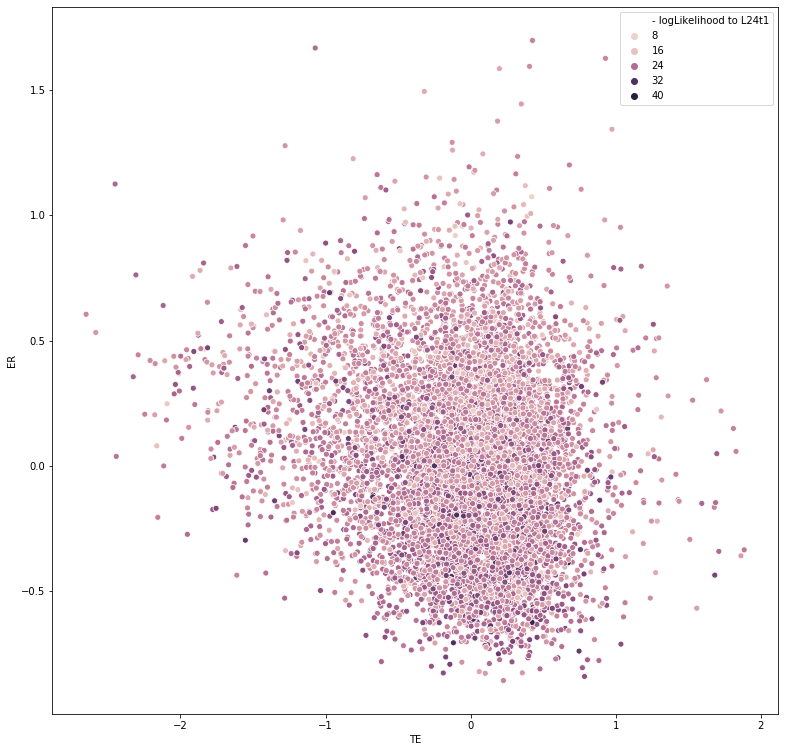

In [67]:
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.scatterplot(x="TE", y="ER", data=data, hue = '- logLikelihood to L24t1')#,legend='full')
#fig.savefig('byProbKozakL24T1/scatter ER against TE t1 by likelihood to L24t1.png')

In [68]:
cluster = pd.read_csv('te_cluster_kcosine_fig2_infolder.gct',sep='\t')
cid = []
for acc in data['AccNum']:
    cid.append(cluster.loc[cluster['id']==acc,'k_means_8'].values[0])

In [69]:
data['cluster'] = cid
data['cluster'] = data.cluster.astype('category')

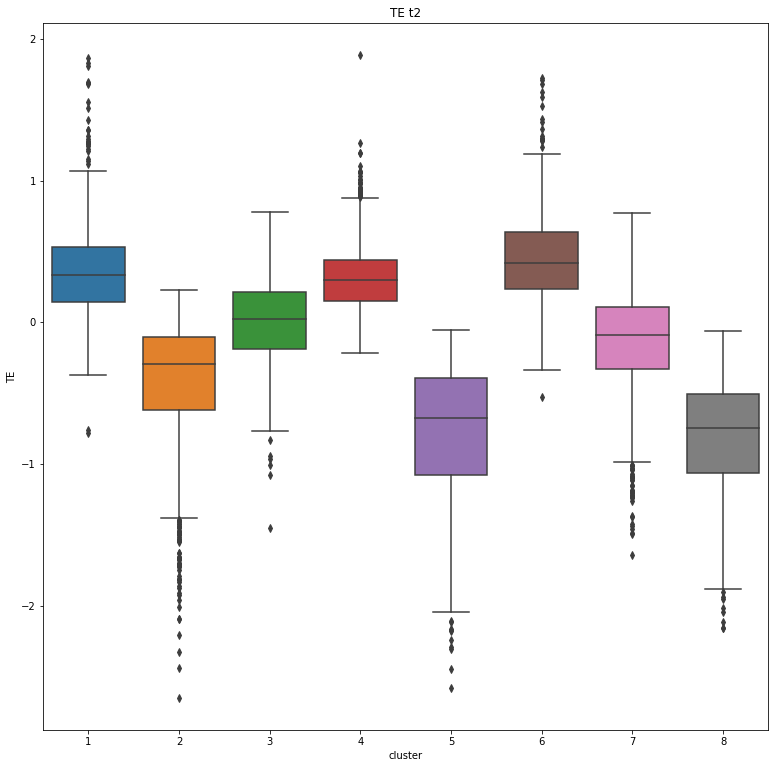

In [71]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.boxplot(data = data, x = 'cluster', y = 'TE')
ax.title.set_text('TE t2')
fig.savefig('byCluster/box TE against L24t1logo t2.png')

In [114]:
fil = 2
cluster = pd.read_csv('../../../../plot cluster/fil'+str(fil)+'_cluster_mergeRPKM')
cid = []
for acc in data['AccNum']:
    cid.append(cluster.loc[cluster['id']==acc,'k_means_8'].values[0])

In [115]:
data['cluster'] = cid
data['cluster'] = data.cluster.astype('category')

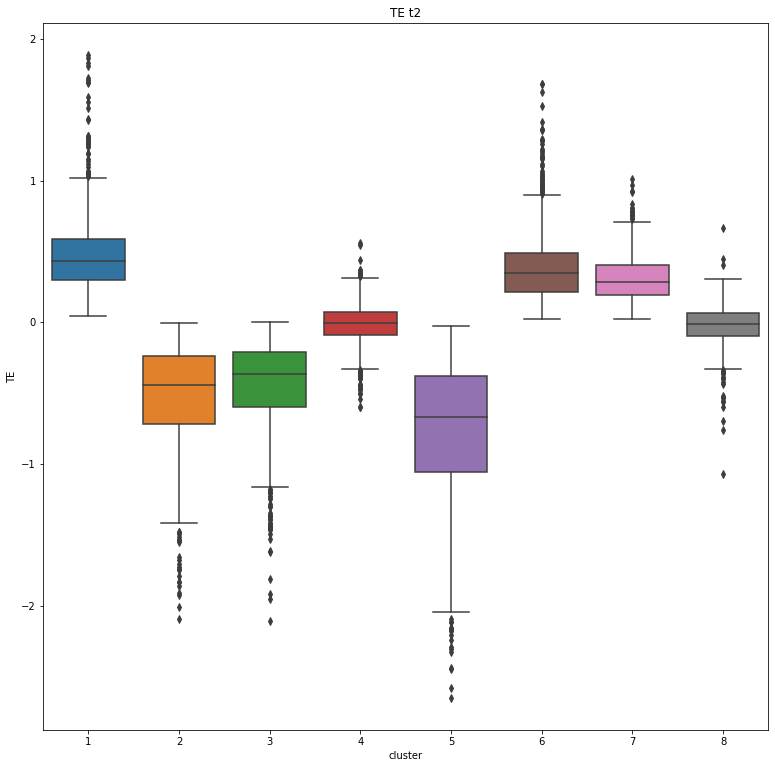

In [116]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.boxplot(data = data, x = 'cluster', y = 'TE')
ax.title.set_text('TE t2')
fig.savefig('byCluster/fil'+str(fil)+'/box TE against cluster '+time+'.png')

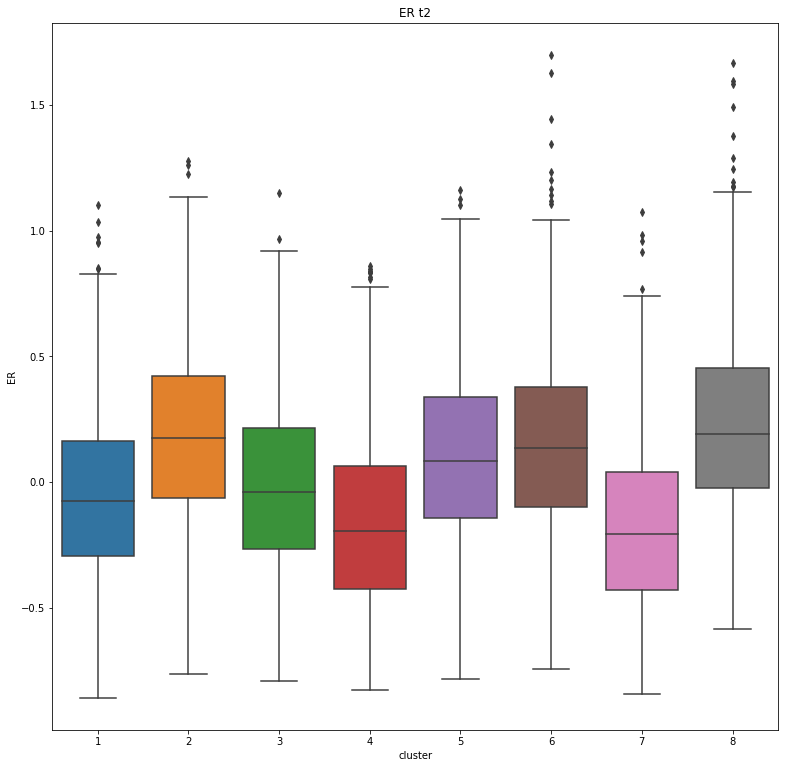

In [117]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.boxplot(data = data, x = 'cluster', y = 'ER')
ax.title.set_text('ER t2')
fig.savefig('byCluster/fil'+str(fil)+'/box ER against cluster '+time+'.png')

In [52]:
#fig, ax = plt.subplots(figsize=(13, 13))
#ax = sns.scatterplot(x="TE", y="ER", data=data, hue = 'cluster',legend='full')
#fig.savefig('byCluster/scatter ER against TE t2 by cluster.png')

In [63]:
#max(data['cluster'])

8

In [47]:
#data = data[data['- logLikelihood to L24t1'].notna()]
#data['diff to L24t1'] = (data['- logLikelihood to L24t1'] / 6 ).astype(int).astype('category')

D:\anaconda3\envs\comp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


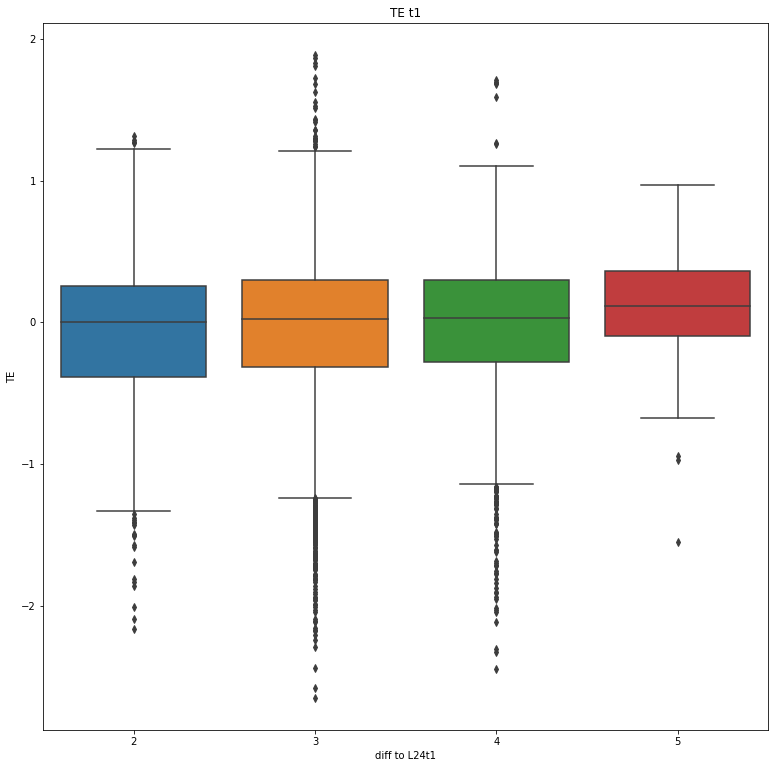

In [48]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.boxplot(data = data, x = 'diff to L24t1', y = 'TE')
ax.title.set_text('TE t1')
fig.savefig('byProbKozakL24T1/box TE against L24t1logo t1.png')